In [23]:
%matplotlib inline 
import matplotlib.pyplot as plt 

import pandas
import numpy as np 
import seaborn as sns 

In [24]:
df = pandas.read_csv( 'xiokang_predictions.csv',index_col=0 )
df.head()

,total_score,fa_rep,hbond_sc,all_cst,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,tot_nlsurfaceE_pm,...,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm,measured_kcat,predicted_kcat,measured_km,predicted_km,measured_kcatkm,predicted_kcatkm
mutant,,,,,,,,,,,,,,,,,,,,,
p329w,-630.259,225.270,-72.484,0.007,0.703,0.695,147.5,438.1,150.6,0.997,...,-10.976,0.900,7.5,1.0,NaN,NaN,NaN,NaN,-5.0,-2.891339
w399g,-626.285,223.275,-71.773,0.008,0.693,0.683,144.1,437.8,146.3,1.053,...,-11.011,0.882,7.6,1.0,NaN,NaN,NaN,NaN,-5.0,-3.028030
w399s,-628.345,224.627,-73.261,0.006,0.691,0.690,144.3,439.7,147.2,1.132,...,-10.663,0.889,7.6,1.0,NaN,NaN,NaN,NaN,-5.0,-2.994062
w407g,-625.710,222.388,-69.724,0.007,0.694,0.689,147.7,435.7,148.8,1.066,...,-9.075,0.888,5.9,1.0,NaN,NaN,NaN,NaN,-5.0,-2.980504
w407r,-627.240,223.852,-71.640,0.010,0.698,0.693,150.0,438.5,148.9,0.987,...,-10.090,0.900,6.8,1.0,NaN,NaN,NaN,NaN,-5.0,-2.966427


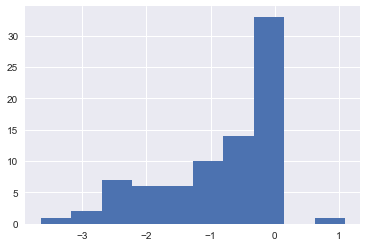

In [25]:
df.measured_kcat.hist()

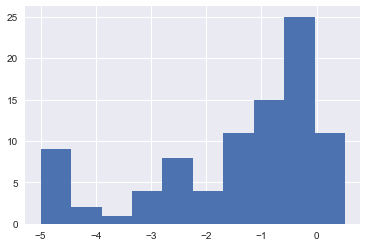

In [26]:
df.measured_kcatkm.hist()

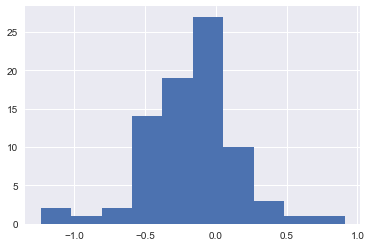

In [27]:
df.measured_km.hist()

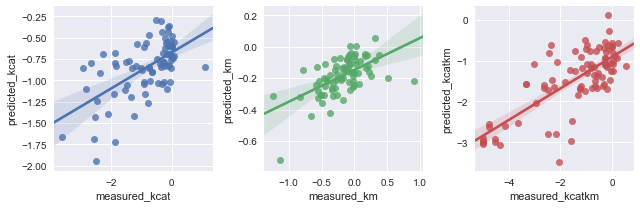

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(9,3))
sns.regplot(df.measured_kcat,df.predicted_kcat,ax=ax[0])
sns.regplot(df.measured_km,df.predicted_km,ax=ax[1])
sns.regplot(df.measured_kcatkm,df.predicted_kcatkm,ax=ax[2])
fig.tight_layout()

In [28]:
X = df[(df.measured_km>-5)].ix[:,0:55]
y = df[(df.measured_km>-5)].ix[:,57].ravel()

X.shape, y.shape

((80, 55), (80,))

In [29]:
zero_var_features = [ n for n in X.columns if X[n].std() == 0 ]
zero_var_features

['tot_seq_recovery',
 'SR_1_hbond_sc',
 'SR_1_hbond_pm',
 'SR_1_burunsat_pm',
 'SR_2_burunsat_pm',
 'SR_3',
 'SR_3_hbond_sc',
 'SR_3_hbond_pm',
 'SR_3_burunsat_pm',
 'SR_4_all_cst']

In [8]:
X = X.drop(zero_var_features,axis=1)
X.shape, y.shape 

((80, 45), (80,))

In [9]:
df = X.copy()
df['target'] = y 
df.corr()['target'].sort_values()

hbond_sc                -0.301047
SR_5_hbond_sc           -0.269514
SR_5_total_score        -0.251391
SR_5_interf_E_1_2       -0.251099
SR_4_fa_rep             -0.221114
tot_nlsurfaceE_pm       -0.216543
SR_2_hbond_sc           -0.151297
tot_total_neg_charges   -0.127938
SR_3_all_cst            -0.125538
SR_1_all_cst            -0.125538
total_score             -0.107778
SR_5_all_cst            -0.106289
SR_2_all_cst            -0.102063
SR_1_total_score        -0.092787
SR_3_total_score        -0.092787
tot_burunsat_pm         -0.076111
SR_2_total_score        -0.067098
SR_2_pstat_pm           -0.036596
SR_4_hbond_sc           -0.024271
all_cst                 -0.020048
SR_5_dsasa_1_2          -0.014687
SR_2_nlpstat_pm          0.006799
SR_4_burunsat_pm         0.032365
SR_4_hbond_pm            0.032539
SR_1_pstat_pm            0.042409
SR_3_pstat_pm            0.042409
tot_pstat_pm             0.069490
SR_5_burunsat_pm         0.073178
SR_4_pstat_pm            0.109145
SR_5_fa_rep   

In [10]:
from sklearn import preprocessing, linear_model, pipeline, model_selection

In [11]:
pln = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('linear_regression', linear_model.LinearRegression())
])

/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


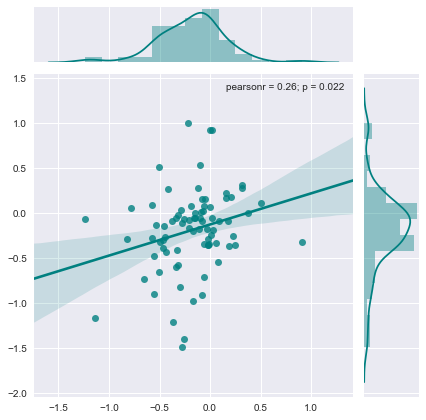

In [12]:
pred = model_selection.cross_val_predict(pln, X, y, cv=10) 
sns.jointplot(y, pred, kind='reg', color='teal') 

In [18]:
pln = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('elastic_net', linear_model.Ridge(max_iter=1e6))
])

/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


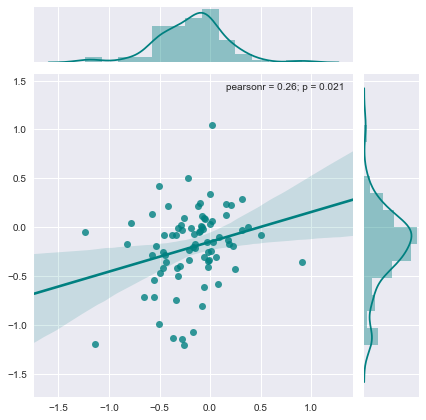

In [19]:
pred = model_selection.cross_val_predict(pln, X, y, cv=10) 
sns.jointplot(y, pred, kind='reg', color='teal') 

In [20]:
from sklearn import ensemble


In [21]:
pln = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('elastic_net', ensemble.BaggingRegressor(linear_model.Ridge(max_iter=1e6),n_estimators=100))
])

/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


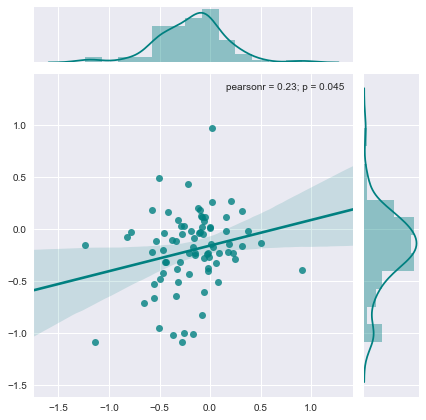

In [22]:
pred = model_selection.cross_val_predict(pln, X, y, cv=10) 
sns.jointplot(y, pred, kind='reg', color='teal') 